### MapCorps , NYC "power wall" menthol rating  

#### Author : Avigai Vantu NYU mHealth , March 2017

In [2]:
import pandas as pd
import numpy as np
#import geopandas as gpd

from sklearn.metrics import cohen_kappa_score

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# we need to account for diffrences b/w raters, so find the interval between two columns
#for example and flag anyt gap which is bigger than 20%. 

In [5]:
mc = pd.read_csv('geofinal.csv')

In [6]:
mc.head(5)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,outletID,Subway Station,Tobacco Outlet Address,ZIP,Important Notes,Images (Y/N),Quality (Y/N),...,gm_pkgclr_y,other_y,other_quantity_y,other_flavor_y,other_pkgclr_y,unidentifiable_brand_y,issues_y,geo22,lon,lat
0,0,0,0,1.0,"7th Ave. (B,Q)",310 FLATBUSH AVE Brooklyn NY 11238,11238.0,partially hidden behind counter,Y,Y,...,NaN,N,NaN,NaN,NaN,1,NaN,"[40.6773151, -73.97286009999999]",-73.972860,40.677315
1,1,1,1,2.0,"7th Ave. (B,Q)",387 FLATBUSH AVE Brooklyn NY 11238,11238.0,"very far behind counter, difficult to see",Y,Y,...,NaN,N,NaN,NaN,NaN,NaN,NaN,"[40.6760809, -73.9714004]",-73.971400,40.676081
2,2,2,2,3.0,"7th Ave. (B,Q)",322 FLATBUSH AVE Brooklyn NY 11238,11238.0,Difficult to see if menthol,Y,Y,...,NaN,N,NaN,NaN,NaN,NaN,NaN,"[40.6770555, -73.9726146]",-73.972615,40.677056
3,3,3,3,4.0,Bedford Ave. (L),150 N 7TH ST Brooklyn NY 11211,11221.0,NaN,Y,Y,...,NaN,N,NaN,NaN,NaN,NaN,NaN,"[40.718636, -73.959009]",-73.959009,40.718636
4,4,4,4,5.0,Bedford Ave. (L),183 BEDFORD AVE Brooklyn NY 11211,11221.0,NaN,Y,Y,...,NaN,N,NaN,NaN,NaN,NaN,NaN,"[40.7177917, -73.95749649999999]",-73.957496,40.717792


In [7]:
print  mc.dtypes

Unnamed: 0                   int64
Unnamed: 0.1                 int64
Unnamed: 0.1.1               int64
outletID                   float64
Subway Station              object
Tobacco Outlet Address      object
ZIP                        float64
Important Notes             object
Images (Y/N)                object
Quality (Y/N)               object
Quality (Y/N) Comments      object
Name                        object
Borough                     object
name_1                      object
Cons 1                      object
numerator green_1          float64
denom_all_1                float64
Non-cons 1                  object
numerator all_1            float64
denom_all_1.1              float64
name_2                      object
Cons 2                      object
numerator green_2          float64
denom_all_2                float64
Non-cons 2                  object
Num_All_2                  float64
denom_all_2.1               object
Name*                       object
Cons*               

In [8]:
#mc= mc.reset_index()
#del mc['index']

In [9]:
#mc = mc.reset_index(drop=True)

mc.reset_index(inplace=True)

In [10]:
# making sure .1 and .2 are duplicats 

print mc['denom_all_1.1'].head()
print mc['denom_all_1'].head()
print mc['denom_all_2.1'].head()
print mc['denom_all_2'].head()
print mc['Denom_All.1'].head()

0     38.0
1     14.0
2    339.0
3     34.0
4     46.0
Name: denom_all_1.1, dtype: float64
0     38.0
1     14.0
2    339.0
3     34.0
4     46.0
Name: denom_all_1, dtype: float64
0    34
1    18
2    42
3    34
4    50
Name: denom_all_2.1, dtype: object
0    34.0
1    18.0
2    42.0
3    34.0
4    50.0
Name: denom_all_2, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Denom_All.1, dtype: float64


In [11]:
# delete duplicates 

del mc['denom_all_1.1']

del mc['denom_all_2.1']

del mc['Denom_All.1']

In [12]:
#how does it looks now? 

print  mc.dtypes

index                        int64
Unnamed: 0                   int64
Unnamed: 0.1                 int64
Unnamed: 0.1.1               int64
outletID                   float64
Subway Station              object
Tobacco Outlet Address      object
ZIP                        float64
Important Notes             object
Images (Y/N)                object
Quality (Y/N)               object
Quality (Y/N) Comments      object
Name                        object
Borough                     object
name_1                      object
Cons 1                      object
numerator green_1          float64
denom_all_1                float64
Non-cons 1                  object
numerator all_1            float64
name_2                      object
Cons 2                      object
numerator green_2          float64
denom_all_2                float64
Non-cons 2                  object
Num_All_2                  float64
Name*                       object
Cons*                       object
Num_Green           

In [13]:
# create new columns to caclulate the prcentage of green products in the 
#"power wall" by dviding numerator green by denominator green


#for green 1

mc['precgreen1'] = (mc['numerator green_1']/mc['denom_all_1'])*100

#for green 2

mc['precgreen2'] = (mc['numerator green_2']/mc['denom_all_2'])*100

#for non green menthol products 1

mc['precall1'] = (mc['numerator all_1']/mc['denom_all_1'])*100

#for non green menthol products 2

mc['precall2'] = (mc['Num_All_2']/mc['denom_all_2'])*100


In [14]:
#mc['Num_All_2']['precall2'][71:74]

In [15]:
#averge between rater one and rater two. 

# for green apply: create new column for:  (precntage of green 1 + precentage of green 2)/ 2 

mc['avrgreen'] = (mc['precgreen1'] + mc['precgreen2']) / 2


# for green + non green menthol products apply: (precntage of all 1 + precentage of all 2)/ 2 

mc['avrall'] = (mc['precall1'] + mc['precall2']) / 2



In [16]:
#does the avr look reasonable for green rating? 

#new
print mc['avrgreen'].head()
#and the rest
print mc['precgreen1'].head()
print mc['precgreen2'].head()

0    10.835913
1    19.047619
2    15.992415
3    26.470588
4    30.217391
Name: avrgreen, dtype: float64
0    15.789474
1    21.428571
2    17.699115
3    26.470588
4    30.434783
Name: precgreen1, dtype: float64
0     5.882353
1    16.666667
2    14.285714
3    26.470588
4    30.000000
Name: precgreen2, dtype: float64


In [17]:
# how about for non green products? 

#new
print mc['avrall'].head()

#an the rest
print mc['precall1'].head()
print mc['precall2'].head()

# when there's an NaN in one column or both the avr will be NaN as well 


0    13.777090
1    22.619048
2    20.754319
3    30.882353
4    36.304348
Name: avrall, dtype: float64
0    15.789474
1    28.571429
2    17.699115
3    29.411765
4    32.608696
Name: precall1, dtype: float64
0    11.764706
1    16.666667
2    23.809524
3    32.352941
4    40.000000
Name: precall2, dtype: float64


In [18]:
# let's try to identify outliers or gaps among raters. 
# to do so I will calculate the absulute interval b/w the 
# precentage of green products of rater 1 and rater 2 

# create a new column ==  | %green1 - %green2 |

mc['green_gap'] = abs(mc['precgreen1'] - mc['precgreen2'])

# create a new column ==  | %green1 - %green2 | 

mc['all_gap'] = abs(mc['precall1'] - mc['precall2'])


print mc.green_gap.head()

print mc.all_gap.head()

0    9.907121
1    4.761905
2    3.413401
3    0.000000
4    0.434783
Name: green_gap, dtype: float64
0     4.024768
1    11.904762
2     6.110409
3     2.941176
4     7.391304
Name: all_gap, dtype: float64


green mean 11.0073869843
all mean 14.0829666993


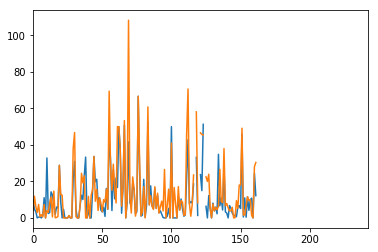

In [19]:
#plot the gap b/w rater one and rater 2


mc.green_gap.plot()

mc.all_gap.plot()

print "green mean", mc.green_gap.mean()

print "all mean", mc.all_gap.mean()

In [20]:
# calculate standard deviation 

# 1. for all
print "std of precentage of all", mc.avrall.std()

# 2. for green 

print "std of precentage of green", mc.avrgreen.std()



std of precentage of all 16.3190442099
std of precentage of green 15.2750136793


In [21]:
# plot the 

In [22]:
# create data frames which have more than 20% gap b/w raters

mc_green_gap = mc[mc['green_gap']>20]
mc_all_gap = mc[mc['all_gap']>20]

#who is this outlier? 
print mc[mc['green_gap']>50].head()

     index  Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  outletID  \
66      66          66            66              66      67.0   
76      76          76            76              76      77.0   
83      83          83            83              83      84.0   
123    123         123           123             123     124.0   

                           Subway Station  \
66                St Lawrence Av, 6 train   
76   Westchester Sq - E Tremont, 6 train    
83                        125 St, 1 train   
123                     67th Ave. (E,M,R)   

                    Tobacco Outlet Address      ZIP  \
66         1791 GLEASON AVE Bronx NY 10472  10472.0   
76   134 WESTCHESTER SQUARE Bronx NY 10461  10461.0   
83       501 W 125TH ST Manhattan NY 10027  10027.0   
123         6725 AUSTIN ST Queens NY 11375  11375.0   

                Important Notes Images (Y/N)    ...            lon        lat  \
66                          NaN            Y    ...     -73.866601  40.829955   
76   

In [29]:
mc_green_gap.head()


,index,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,outletID,Subway Station,Tobacco Outlet Address,ZIP,Important Notes,Images (Y/N),...,lon,lat,precgreen1,precgreen2,precall1,precall2,avrgreen,avrall,green_gap,all_gap
10,10,10,10,10,11.0,"Kings Highway (B,Q)",1521 KINGS HWY Brooklyn NY 11229,11229.0,Pharmacy,Y,...,-73.957611,40.609334,12.307692,45.161290,16.923077,12.903226,28.734491,14.913151,32.853598,4.019851
19,19,19,19,19,20.0,Kosciuszko St. (J),1165 BROADWAY Brooklyn NY 11221,11221.0,NaN,Y,...,-73.927762,40.693226,17.307692,46.153846,17.307692,46.153846,31.730769,31.730769,28.846154,28.846154
29,29,29,29,29,30.0,"Pennsylvania Ave. (2,3,4,5)",578 LIVONIA AVE Brooklyn NY 11207,11207.0,NaN,Y,...,-73.895771,40.664306,28.571429,50.000000,28.571429,66.666667,39.285714,47.619048,21.428571,38.095238
30,30,30,30,30,31.0,"Pennsylvania Ave. (2,3,4,5)",504 PENNSYLVANIA AVE Brooklyn NY 11207,11207.0,NaN,Y,...,-73.894405,40.664971,11.111111,42.105263,11.111111,57.894737,26.608187,34.502924,30.994152,46.783626
37,37,37,37,37,38.0,"Sterling St. (2,5)",1037 NOSTRAND AVE Brooklyn NY 11225,11225.0,NaN,Y,...,-73.950675,40.662920,7.692308,30.769231,7.692308,30.769231,19.230769,19.230769,23.076923,23.076923


In [40]:
#change columns name

mc_all_gap['Subway_Station'] = mc_all_gap['Subway Station']
mc_all_gap['Tobacco_Outlet_Addres'] = mc_all_gap['Tobacco Outlet Address']
mc_green_gap['Subway_Station'] = mc_green_gap['Subway Station']
mc_green_gap['Tobacco_Outlet_Addres'] = mc_green_gap['Tobacco Outlet Address']

/Users/avigailvantu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/avigailvantu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/avigailvantu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [41]:
len(mc_all_gap)

34

In [42]:
len(mc_green_gap)

30

In [45]:
all_gap = mc_all_gap[['outletID','Subway_Station','Tobacco_Outlet_Addres']].copy()
green_gap = mc_green_gap[['outletID','Subway_Station','Tobacco_Outlet_Addres']].copy()

In [48]:
print len(green_gap)
print len(all_gap)

30
34


In [49]:
#export to csv
all_gap.to_csv('mc_all_gap.csv')
green_gap.to_csv('mc_green_gap.csv')

In [50]:
#create data frames for each borough 

# 1. Queens: 

qndf = mc[mc['Borough'] =='QN']

# 2. Brooklyn: 

bkdf = mc[mc['Borough']== 'BK']

# 3. Bronx 

bxdf = mc[mc['Borough']== 'BX']

# 4. Manahttan 

mndf = mc[mc['Borough']== 'MN']


In [51]:
# print number of outlets per borough

print 'bronx', len(bxdf)

print 'brooklyn', len(bkdf)

print 'queens' , len(qndf)

print 'manahattan', len(mndf)


bronx 39
brooklyn 39
queens 46
manahattan 38


In [52]:
# reset 4 df index 

mndf.reset_index(inplace=True)
qndf.reset_index(inplace=True)
bxdf.reset_index(inplace=True)
bkdf.reset_index(inplace=True)

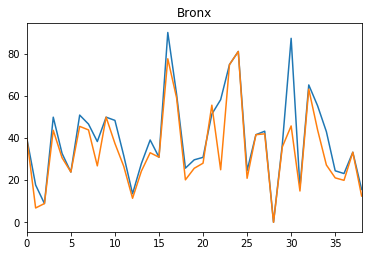

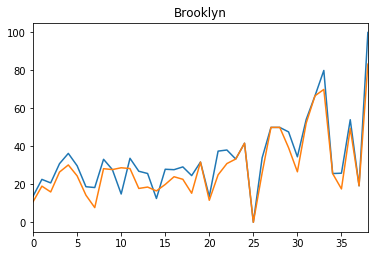

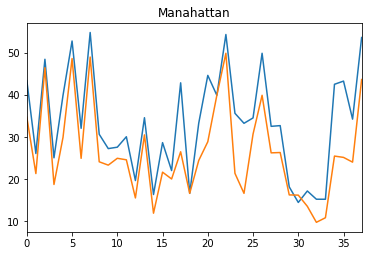

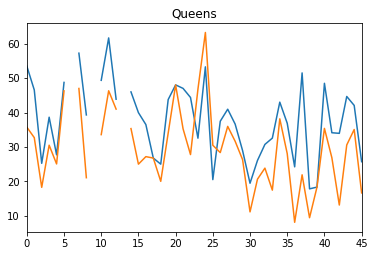

In [53]:
# plot the precentage green and non green for each boroough 

#bronx

fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_title('Bronx')

bxdf.avrall.plot()

bxdf.avrgreen.plot()
plt.show()

#brooklyn

fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_title('Brooklyn')

bkdf.avrall.plot()

bkdf.avrgreen.plot()
plt.show()

#Manahattan 

fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_title('Manahattan')

mndf.avrall.plot()

mndf.avrgreen.plot()
plt.show()


#Queens

fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_title('Queens')

qndf.avrall.plot()

qndf.avrgreen.plot()
plt.show()

In [54]:
del mndf['index']

In [55]:
bkdf

,level_0,index,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,outletID,Subway Station,Tobacco Outlet Address,ZIP,Important Notes,...,lon,lat,precgreen1,precgreen2,precall1,precall2,avrgreen,avrall,green_gap,all_gap
0,0,0,0,0,0,1.0,"7th Ave. (B,Q)",310 FLATBUSH AVE Brooklyn NY 11238,11238.0,partially hidden behind counter,...,-73.972860,40.677315,15.789474,5.882353,15.789474,11.764706,10.835913,13.777090,9.907121,4.024768
1,1,1,1,1,1,2.0,"7th Ave. (B,Q)",387 FLATBUSH AVE Brooklyn NY 11238,11238.0,"very far behind counter, difficult to see",...,-73.971400,40.676081,21.428571,16.666667,28.571429,16.666667,19.047619,22.619048,4.761905,11.904762
2,2,2,2,2,2,3.0,"7th Ave. (B,Q)",322 FLATBUSH AVE Brooklyn NY 11238,11238.0,Difficult to see if menthol,...,-73.972615,40.677056,17.699115,14.285714,17.699115,23.809524,15.992415,20.754319,3.413401,6.110409
3,3,3,3,3,3,4.0,Bedford Ave. (L),150 N 7TH ST Brooklyn NY 11211,11221.0,NaN,...,-73.959009,40.718636,26.470588,26.470588,29.411765,32.352941,26.470588,30.882353,0.000000,2.941176
4,4,4,4,4,4,5.0,Bedford Ave. (L),183 BEDFORD AVE Brooklyn NY 11211,11221.0,NaN,...,-73.957496,40.717792,30.434783,30.000000,32.608696,40.000000,30.217391,36.304348,0.434783,7.391304
5,5,5,5,5,5,6.0,Bedford Ave. (L),167 BEDFORD AVE Brooklyn NY 11211,11221.0,paritally blocked by vendor,...,-73.957129,40.718203,24.210526,24.731183,29.473684,30.107527,24.470855,29.790606,0.520656,0.633843
6,6,6,6,6,6,7.0,Bedford Ave. (L),160 BEDFORD AVE Brooklyn NY 11249,11249.0,NaN,...,-73.957155,40.718640,14.285714,14.285714,19.642857,17.857143,14.285714,18.750000,0.000000,1.785714
7,7,7,7,7,7,8.0,Bedford Ave. (L),154 BEDFORD AVE Brooklyn NY 11249,11249.0,display is misleading,...,-73.956989,40.718787,8.333333,7.142857,18.055556,18.571429,7.738095,18.313492,1.190476,0.515873
8,8,8,8,8,8,9.0,Bedford Ave. (L),185 BEDFORD AVE Brooklyn NY 11211,11221.0,Best wall of cigs seen,...,-73.957708,40.717669,33.788396,22.727273,36.860068,29.545455,28.257834,33.202761,11.061123,7.314614
9,9,9,9,9,9,10.0,"Kings Highway (B,Q)",1932 KINGS HWY Brooklyn NY 11229,11229.0,blocked by vendor,...,-73.953786,40.610355,27.777778,27.777778,27.777778,27.777778,27.777778,27.777778,0.000000,0.000000


    level_0  Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  outletID  \
12       90          90            90              90      91.0   
14       92          92            92              92      93.0   
18       96          96            96              96      97.0   
29      107         107           107             107     108.0   
30      108         108           108             108     109.0   
31      109         109           109             109     110.0   
32      110         110           110             110     111.0   
33      147         147           147             147     153.0   

                                      Subway Station  \
12                           96th St, 1, 2, &3 train   
14                         Cortlandt St, N & R train   
18                         Cortlandt St, N & R train   
29  Union Square Station, 4, 5, 6, L, N, Q & R train   
30  Union Square Station, 4, 5, 6, L, N, Q & R train   
31  Union Square Station, 4, 5, 6, L, N, Q & R train   
32  

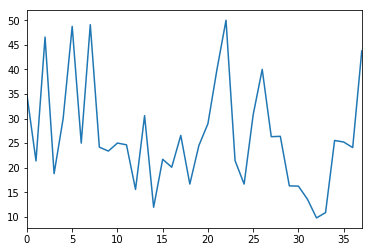

In [56]:
#looking for the Mnahattan anomally 

print mndf[mndf['avrall']<20]

mndf.avrgreen.plot()

In [57]:
#calculate average for each borough - data frame for both green and all, one value

# Bronx 

print '- Bronx average all is',  bxdf.avrall.mean()
print '- Bronx average green is',  bxdf.avrgreen.mean()

# Brooklyn 

print '- Brooklyn average all is',  bkdf.avrall.mean()
print '- Brooklyn average green is',  bkdf.avrgreen.mean()

# Queens 

print '- Queens average all is',  qndf.avrall.mean()
print '- Queens average green is',  qndf.avrgreen.mean()

# Manahattan 

print '- Manahattan average all is',  mndf.avrall.mean()
print '- Manahattan average green is',  mndf.avrgreen.mean()




- Bronx average all is 40.152260707
- Bronx average green is 34.7458677395
- Brooklyn average all is 33.6718250267
- Brooklyn average green is 29.4244644577
- Queens average all is 37.9173209297
- Queens average green is 29.6516337811
- Manahattan average all is 33.3306638771
- Manahattan average green is 26.4493733592


In [58]:
#average of green products per 

In [32]:
print mc['precgreen2'].head()
print mc['precall2'].head()

0     5.882353
1    16.666667
2    14.285714
3    26.470588
4    30.000000
Name: precgreen2, dtype: float64
0    11.764706
1    16.666667
2    23.809524
3    32.352941
4    40.000000
Name: precall2, dtype: float64


In [31]:
#green1 =mc['numeratorgreen1'].tolist()
#green2 =mc['numeratorgreen2'].tolist()


## cohen's kappa test:

In [32]:
#testing cohen's kappa with fabricated lists as inputs
green1 = [2,3,4,5,5,5,5,5,4,3,3,2,2]
green2 = [2,3,4,5,5,5,5,5,4,4,3,2,2]
mc['numeratorgreen1'] = mc['numerator green_1']
mc['numeratorgreen2'] = mc['numerator green_2']

In [33]:
cohen_kappa_score(precgreen1, precgreen2)

NameError: name 'precgreen1' is not defined

In [ ]:
len(mc)

In [ ]:
print mc.columns

In [ ]:
print mc['Borough'].value_counts()

In [ ]:
print mc['Subway Station'].value_counts()

In [ ]:
#print mc['ZIP'].value_counts()

### Calculate precentage of green products per rater #1 

In [ ]:
#mc['rater_1_green_prec'] = mc['numerator green_1']/ mc['denominator green_1']

In [ ]:
#print mc['rater_1_green_prec'].head(10)

### Calculate precentage of all menthol products per rater #1

In [ ]:
 mc['rater_1_all_prec']= mc['numerator all_1']/ mc['denominator all_1']

In [ ]:
print mc['rater_1_all_prec'].head(10)

### Calculate precentage of green products per rater #2 

In [ ]:
mc['rater_2_green_prec'] = mc['numerator green_2']/ mc['denominator green_2']

In [ ]:
print mc['rater_2_green_prec'].head(10)

## DataFrame to CSV 

In [ ]:
mc.to_csv('mapcorps analysis')

In [ ]:
 mc[mc['Borough']=='BK' & mc['Images (Y/N)']=='Y', 'yes', 'no')]

## by borough have images at all


In [ ]:
print "Brooklyn Images", len(mc[(mc['Borough'] == "BK") & (mc['Images (Y/N)'] == "Y")]) 
print "Queens Imgeas", len(mc[(mc['Borough'] == "QN") & (mc['Images (Y/N)'] == "Y")]) 
print "Bronx Images", len(mc[(mc['Borough'] == "BX") & (mc['Images (Y/N)'] == "Y")]) 
print "Manhattan Images", len(mc[(mc['Borough'] == "MN") & (mc['Images (Y/N)'] == "Y")]) 

## by borough have images with good quality 

In [ ]:
#print "Brooklyn", len(mc[(mc['Borough'] == "BK") & (mc['Images (Y/N)'] == "Y") & (mc['Quality (Y/N)'] == "Y")]) 
print "Brooklyn quality", len(mc[(mc['Borough'] == "BK")  & (mc['Images (Y/N)'] == "Y")& (mc['Quality (Y/N)'] == "Y")]) 
print "Queens quality", len(mc[(mc['Borough'] == "QN")  & (mc['Images (Y/N)'] == "Y")& (mc['Quality (Y/N)'] == "Y")]) 
print "Bronx quality", len(mc[(mc['Borough'] == "BX") & (mc['Images (Y/N)'] == "Y") & (mc['Quality (Y/N)'] == "Y")]) 
print "Manhattan quality", len(mc[(mc['Borough'] == "MN") & (mc['Images (Y/N)'] == "Y") & (mc['Quality (Y/N)'] == "Y")]) 



#print "Queens", len(mc[(mc['Borough'] == "QN") & (mc['Images (Y/N)'] == "Y")]) 
#print "Bronx", len(mc[(mc['Borough'] == "BX") & (mc['Images (Y/N)'] == "Y")]) 
#print "Manhattan", len(mc[(mc['Borough'] == "MN") & (mc['Images (Y/N)'] == "Y")]) 

In [ ]:
print mc.columns

In [ ]:
mc.Borough.unique()

In [ ]:
mc['SubwaySatation'] = mc['Subway Station']

In [ ]:
mc.SubwaySatation.unique()

In [ ]:
mc.ZIP.unique()

In [ ]:
mc.Name.unique()